In [1]:
##Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315','Proline'] 

In [3]:
#split data 
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,
                                                    random_state=0,
                                                    stratify=y)

Text(0.5,1,'In sample accuracies ')

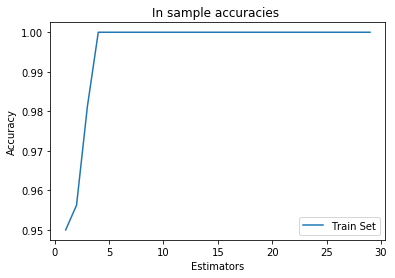

In [9]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
N_estimators =np.arange(1,30,1)
accuracy = []
for i in N_estimators:
    forest = RandomForestClassifier(criterion='gini',n_estimators=i,random_state=1,n_jobs=2)
    forest.fit(X_train, y_train)
    y_train_pred = forest.predict(X_train)
    accuracy.append(metrics.accuracy_score(y_train, y_train_pred))
    
figure_accuracy = plt.figure()
plt.plot(N_estimators, accuracy, label='Train Set')
plt.legend(loc = 4)
plt.xlabel("Estimators")
plt.ylabel("Accuracy")
plt.title("In sample accuracies ")

 1) Proline                        0.175870
 2) Color intensity                0.154388
 3) Flavanoids                     0.150001
 4) Alcohol                        0.132313
 5) OD280/OD315                    0.111566
 6) Hue                            0.078855
 7) Total phenols                  0.059936
 8) Magnesium                      0.030753
 9) Alcalinity of ash              0.029084
10) Malic acid                     0.027351
11) Proanthocyanins                0.024695
12) Ash                            0.013434
13) Nonflavanoid phenols           0.011753


(-1, 13)

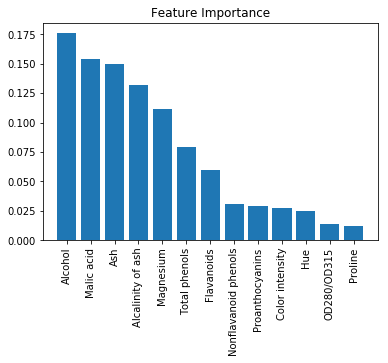

In [10]:
#Random Forest Importancy 
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]],importances[indices[f]]))

fig2 = plt.figure()
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]),feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])